In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy import signal
import IPython

%matplotlib inline



In [2]:
rate, data = wavfile.read('saw.wav')
data = data[:,0]

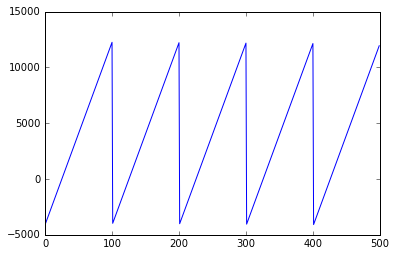

In [3]:
plt.plot(data[0:500])

In [4]:
def calculate_M(slope_width):
    return int(4/slope_width)

def lowpass(cutoff,slope_width):
    M = calculate_M(slope_width)
    Fc = cutoff/rate
    
    #Calculate Filter
    h = np.zeros(M)
    for i in range(M):
        offset = i-(M/2)
        if (offset) == 0:
            h[i] = 2*np.pi*Fc
        else:
            h[i] = np.sin(2*np.pi*Fc*offset)/offset
            
        h[i] *= (0.54 - 0.46* np.cos(2*np.pi*i/M) )
        
    #normalize H
    h = h/np.sum(h)
    
    return h

def highpass(cutoff,slope_width):
    lp_h = lowpass(cutoff,slope_width)
    h = -lp_h
    h[int(len(lp_h)/2)] = 1
    
    return h

def bandpass(band_start,band_stop,slope_width):
    hp = highpass(band_start,slope_width)
    lp = lowpass(band_stop,slope_width)
    
    bp = signal.convolve(hp,lp)
    
    return bp

In [41]:
lowpass(600,0.2)

array([ 0.00666638,  0.00875199,  0.01464122,  0.02396416,  0.03593825,
        0.04944652,  0.06315814,  0.0756773 ,  0.08570273,  0.09217832,
        0.09441638,  0.09217832,  0.08570273,  0.0756773 ,  0.06315814,
        0.04944652,  0.03593825,  0.02396416,  0.01464122,  0.00875199])

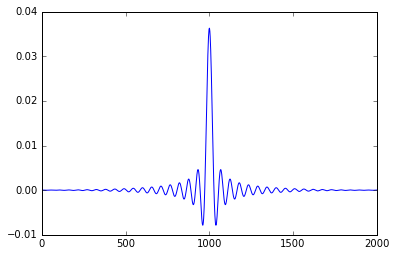

In [11]:
lp_filter = lowpass(800,0.002)
filtered = signal.convolve( data, lp_filter)
plt.plot(lp_filter)

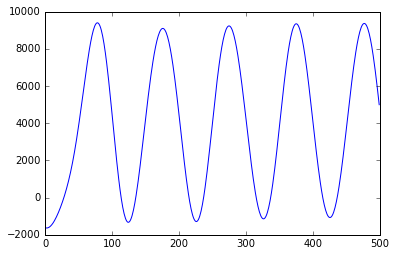

In [12]:
plt.plot(filtered[1000:1500])

In [13]:
IPython.display.Audio(filtered, rate=rate)

In [51]:
IPython.display.Audio(data, rate=rate)